# 📊 Intrade.bar Trading Data Analysis
This notebook analyzes profitability across symbols, time of day, day of week, and trade direction based on intrade export data.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.ticker as mtick

# Matplotlib display inline
%matplotlib inline

In [2]:
df = pd.read_csv("csv/intrade_bar_export.csv", sep=';')

# Clean numeric columns
for col in ["Amount", "Result"]:
    df[col] = df[col].str.replace(" USD", "").astype(float)


In [3]:
from datetime import datetime

def parse_custom_datetime(x):
    return datetime.strptime(x.strip(), "%H:%M:%S, %d %b %y")

df["entry_time"] = df["Date open"].apply(parse_custom_datetime)
df["exit_time"] = df["Date close"].apply(parse_custom_datetime)


In [4]:
df["symbol"] = df["Option"]
df["side"] = df["Up/Down"]
df["pnl"] = df["Result"] - df["Amount"]
df["hour"] = df["entry_time"].dt.hour
df["day_of_week"] = df["entry_time"].dt.day_name()


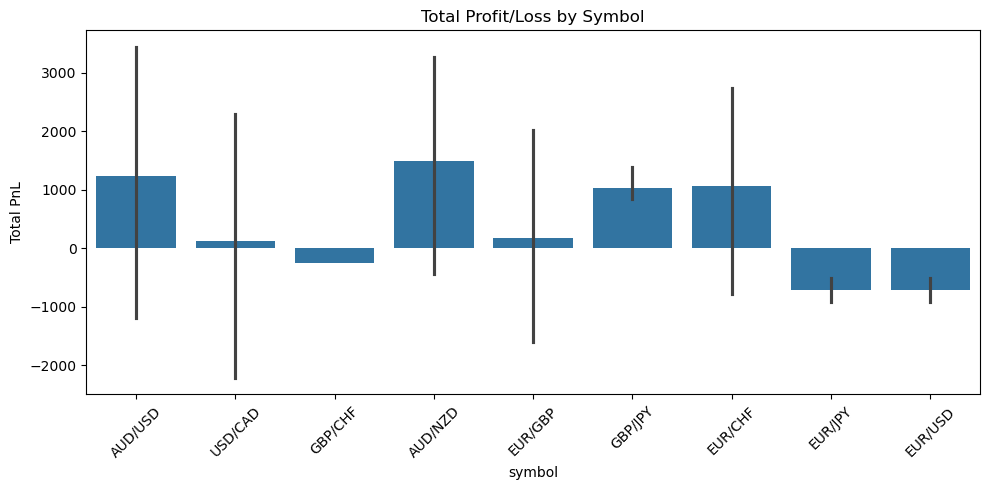

In [5]:
plt.figure(figsize=(10, 5))
sns.barplot(x="symbol", y="pnl", data=df, estimator=sum)
plt.title("Total Profit/Loss by Symbol")
plt.ylabel("Total PnL")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

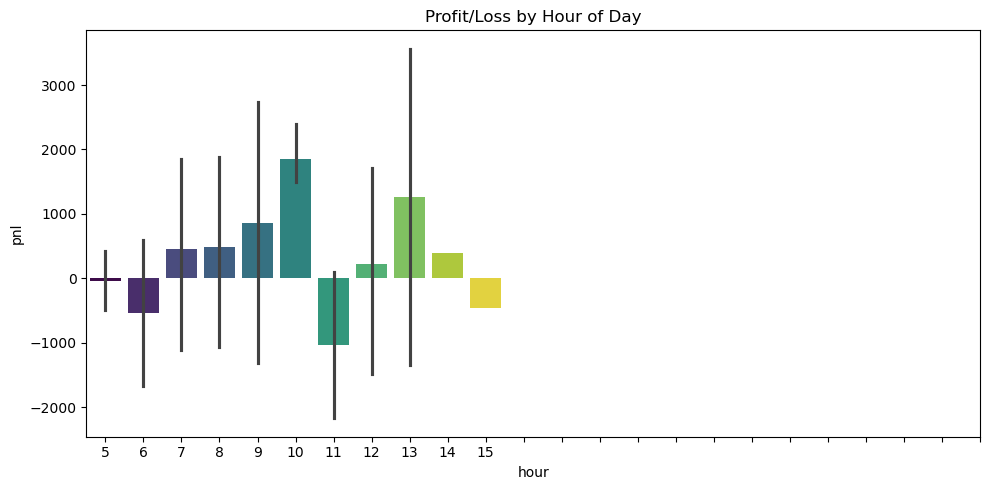

In [6]:
plt.figure(figsize=(10, 5))
sns.barplot(x="hour", y="pnl", data=df, estimator=sum, palette="viridis", hue="hour", legend=False)
plt.title("Profit/Loss by Hour of Day")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

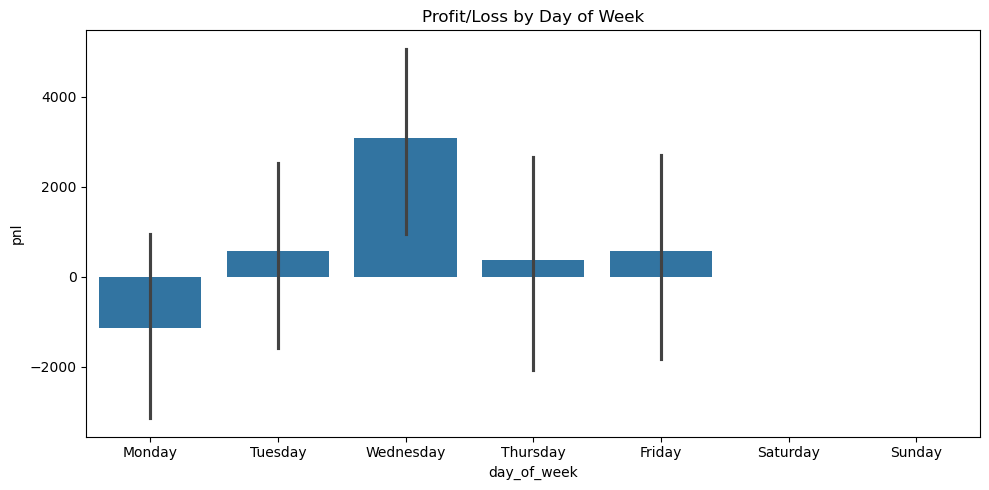

In [7]:
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
plt.figure(figsize=(10, 5))
sns.barplot(x="day_of_week", y="pnl", data=df, estimator=sum, order=order)
plt.title("Profit/Loss by Day of Week")
plt.tight_layout()
plt.show()

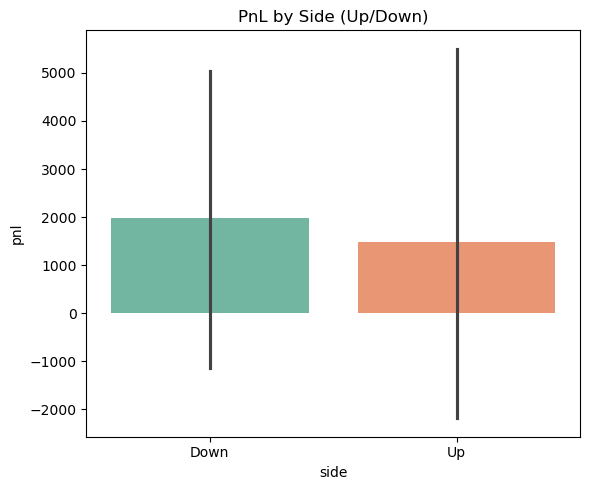

In [8]:
plt.figure(figsize=(6, 5))
sns.barplot(x="side", y="pnl", data=df, estimator=sum, palette="Set2", hue="side", legend=False)
plt.title("PnL by Side (Up/Down)")
plt.tight_layout()
plt.show()

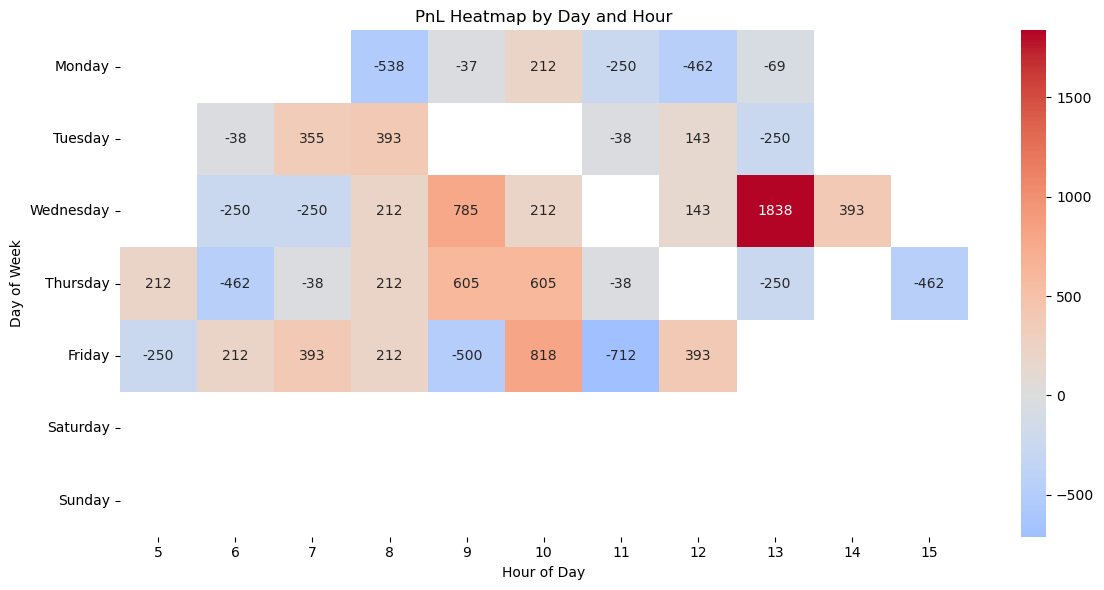

In [10]:
pivot = df.pivot_table(index="day_of_week", columns="hour", values="pnl", aggfunc="sum")
pivot = pivot.reindex(order)
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap="coolwarm", center=0, annot=True, fmt=".0f")
plt.title("PnL Heatmap by Day and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()

In [13]:
fig = px.scatter_3d(
    df,
    x="symbol",
    y="hour",
    z="pnl",
    color="symbol",
    title="3D: Symbol vs Hour vs PnL"
)
fig.update_layout(width=1400, height=1000)
fig.show()